In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Dateset resource: 

2014-2018 team data were collected from the website below.
https://www.nba.com/stats/teams/traditional/?DateFrom=02%2F09%2F2021&DateTo=02%2F09%2F2021&PerMode=Totals&sort=PTS&dir=-1

In [2]:
df = pd.read_csv(os.path.join("../NBA_Data/nbaNewStatByID.csv"))
df = df.dropna()
df.head()

,Team,Year,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,plus_minus
0,0,2014,82,38,44,0.463,3966,8282,3061,6688,...,2565,3278,2041,1251,680,326,354,1577,1643,-39
1,1,2014,82,25,57,0.305,3946,7892,2996,6883,...,2505,3485,1726,1261,584,343,373,1743,1564,-366
2,2,2014,82,44,38,0.537,3976,8079,2931,6391,...,2407,3128,1714,1191,705,311,337,1777,1704,-82
3,3,2014,82,43,39,0.524,3981,7942,2976,6730,...,2724,3500,1778,1010,499,421,415,1493,1716,-18
4,4,2014,82,48,34,0.585,3986,7680,2843,6577,...,2683,3620,1860,1223,594,424,490,1565,1714,152


In [3]:
X = df.drop(["Team","Year","GP","WIN%"], axis=1)
y = df["WIN%"].values.reshape(-1, 1)
print(X.shape, y.shape)

(150, 24) (150, 1)


In [4]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [6]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9999969983044519
Testing Score: 0.9999958698498208


Text(0.5, 1.0, 'Residual Plot')

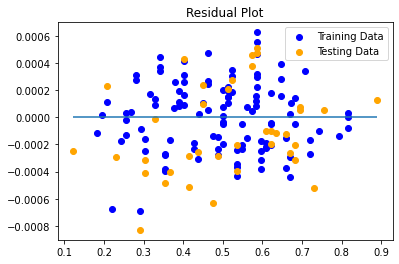

In [7]:
# Plot the Residuals for the Training and Testing data
fig = plt.figure()
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [8]:
# # Save figure
# fig.savefig("../NBA_Model_Img/LinearRegression.png",dpi=100)